## **Import Libraries**


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## **Load Dataset & Initial Exploration**

In [19]:
# Load the dataset
df = pd.read_excel("online_retail.xlsx", engine='openpyxl')

In [20]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [ ]:
# Check missing values in each row
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [ ]:
# check duplicate rows in dataset
df.duplicated().sum()

np.int64(6865)

## **Data Cleaning**

In [ ]:
# Handle Missing Values
df.dropna(subset=["Customer ID", "Description"], inplace=True)

# Remove Duplication
df.drop_duplicates(inplace=True)

# Handle Canceled Orders
df = df[~df['Invoice'].astype(str).str.startswith('C')]

# Handle Outliers
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

In [ ]:
# Save Cleaned Data
df.to_csv("cleaned_online_retail.csv", index=False)

## **Exploratory Data Analysis (EDA)**

### **1) General Overview**

In [ ]:
# Use Seaborn's clean style
sns.set(style="whitegrid")
plt.rcParams['font.size'] = 12

# ---- Metric Calculations ----
unique_products = df['StockCode'].nunique()
total_transactions = df['Invoice'].nunique()
unique_customers = df['Customer ID'].nunique()
country_counts = df['Country'].value_counts().sort_values(ascending=False)
monthly_trend = df.set_index('InvoiceDate').resample('ME')['Invoice'].nunique()

Unique products: 4017 



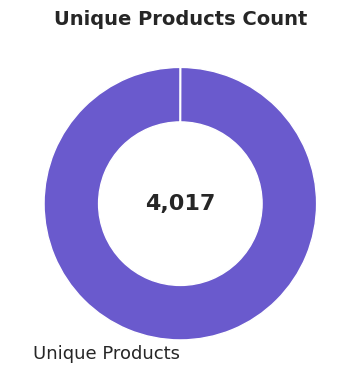

In [ ]:
# - How many unique products are there?
print("Unique products:", df['StockCode'].nunique(),'\n')
plt.figure(figsize=(4, 4))
plt.pie([unique_products, 1], labels=['Unique Products', ''], colors=['#6A5ACD', 'lightgray'],
        startangle=90, wedgeprops={'width':0.4}, textprops={'fontsize':13})
plt.title("Unique Products Count", fontsize=14, weight='bold')
plt.text(0, 0, f"{unique_products:,}", ha='center', va='center', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

Total transactions: 19213 



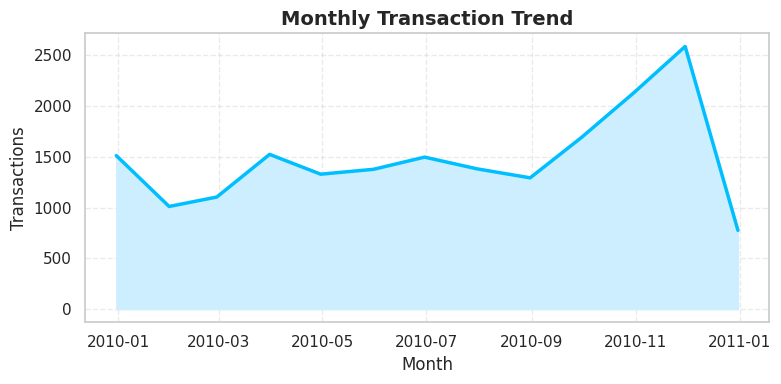

In [ ]:
# - What is the total number of transactions?
print("Total transactions:", df['Invoice'].nunique(),'\n')
plt.figure(figsize=(8, 4))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, color="#00BFFF", linewidth=2.5)
plt.fill_between(monthly_trend.index, monthly_trend.values, color="#cceeff")
plt.title("Monthly Transaction Trend", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Transactions")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Unique customers: 4312 



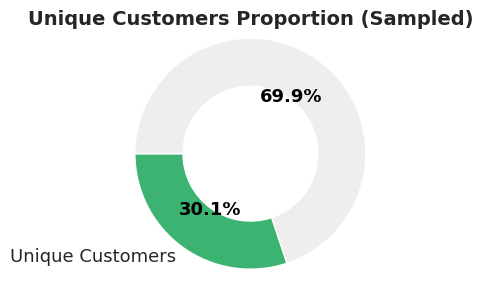

In [ ]:
# - How many unique customers are there?
print("Unique customers:", df['Customer ID'].nunique(),'\n')
plt.figure(figsize=(5, 3))
wedges, texts, autotexts = plt.pie([unique_customers, 10000], startangle=180, radius=1.2,
                                   colors=['#3CB371', '#eeeeee'], labels=['Unique Customers', ''],
                                   autopct='%1.1f%%', textprops={'fontsize':13}, wedgeprops=dict(width=0.5))
plt.setp(autotexts, size=13, weight='bold', color='black')
plt.title("Unique Customers Proportion (Sampled)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

Countries: 37 



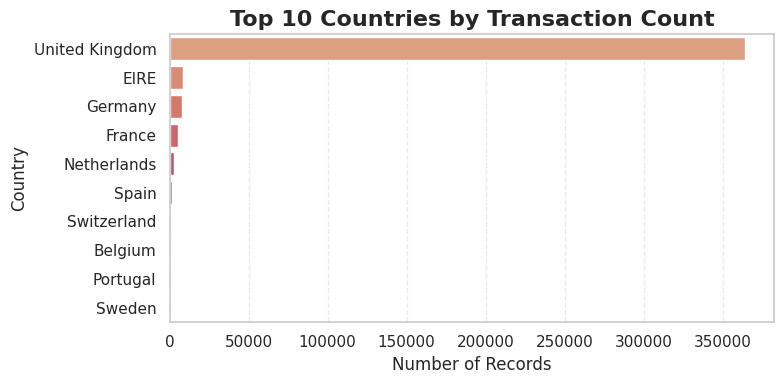

In [ ]:
# - What countries do the customers belong to?
print("Countries:", df['Country'].nunique(),'\n')
plt.figure(figsize=(8, 4))
sns.barplot(x=country_counts.head(10).values, y=country_counts.head(10).index, palette='flare', hue=country_counts.head(10).index)
plt.title("Top 10 Countries by Transaction Count", fontsize=16, weight='bold')
plt.xlabel("Number of Records")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### **2) Product Analysis**

Description
WHITE HANGING HEART T-LIGHT HOLDER    56814
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54610
BROCADE RING PURSE                    48166
PACK OF 72 RETRO SPOT CAKE CASES      45129
ASSORTED COLOUR BIRD ORNAMENT         44431
60 TEATIME FAIRY CAKE CASES           35656
PACK OF 60 PINK PAISLEY CAKE CASES    30871
JUMBO BAG RED RETROSPOT               29519
SMALL POPCORN HOLDER                  25703
BLACK AND WHITE PAISLEY FLOWER MUG    25685
Name: Quantity, dtype: int64


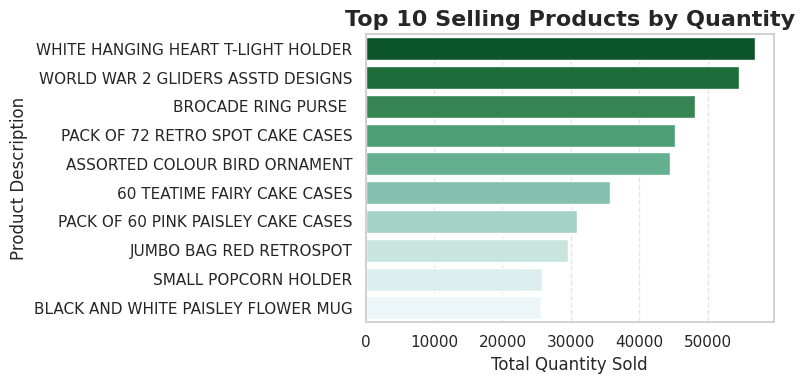

In [ ]:
# - What are the top 10 selling products by quantity?
top_selling = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_selling)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=top_selling.values, y=top_selling.index, palette='BuGn_r', hue=top_selling.index , legend=False)
plt.title("Top 10 Selling Products by Quantity", fontsize=16, weight='bold')
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Description
WHITE HANGING HEART T-LIGHT HOLDER     151339.16
REGENCY CAKESTAND 3 TIER               143727.60
Manual                                  98531.99
ASSORTED COLOUR BIRD ORNAMENT           70291.03
JUMBO BAG RED RETROSPOT                 51644.25
POSTAGE                                 48741.08
ROTATING SILVER ANGELS T-LIGHT HLDR     40156.05
PAPER CHAIN KIT 50'S CHRISTMAS          36871.55
PARTY BUNTING                           35017.30
EDWARDIAN PARASOL NATURAL               34044.75
Name: Revenue, dtype: float64


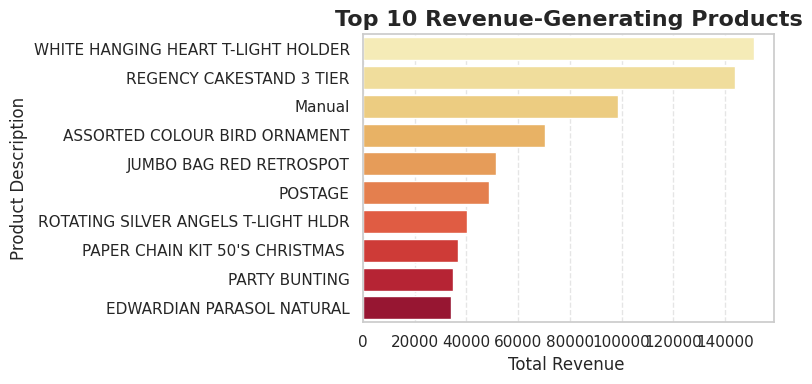

In [ ]:
# - What are the top 10 revenue-generating products?
df['Revenue'] = df['Quantity'] * df['Price']
top_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
print(top_revenue)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(y=top_revenue.index, x=top_revenue.values, palette='YlOrRd', hue=top_revenue.index)
plt.title("Top 10 Revenue-Generating Products", fontsize=16, weight='bold')
plt.xlabel("Total Revenue ")
plt.ylabel("Product Description")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# - Which products have negative or zero unit prices?
invalid_prices_df = df[df['Price'] <= 0]
print("Products with Zero or Negative Unit Prices")
print(f"Total invalid price entries: {len(invalid_prices_df)}")

Products with Zero or Negative Unit Prices
Total invalid price entries: 0


### **3) Customer Analysis**

Customer ID
16754.0     63551
14911.0     69709
17940.0     75825
13687.0     87167
14277.0     87830
14156.0    108105
18102.0    124216
13694.0    125893
14646.0    170278
13902.0    220600
Name: Quantity, dtype: int64


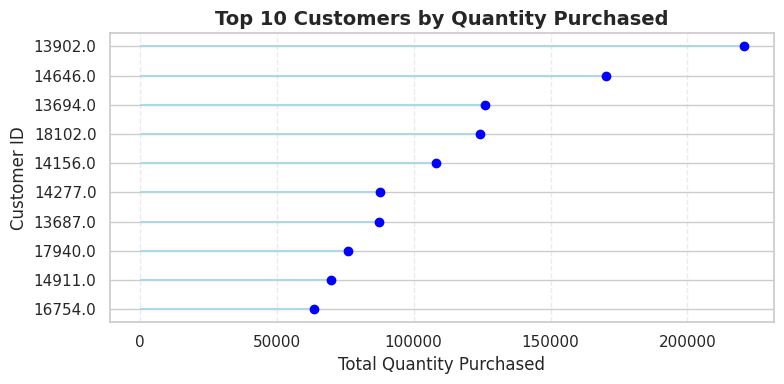

In [ ]:
# - Which customers bought the most products?
top_customers = df.groupby('Customer ID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_sorted = top_customers.sort_values()
print(top_sorted)

plt.figure(figsize=(8, 4))
plt.hlines(y=top_sorted.index.astype(str), xmin=0, xmax=top_sorted.values, color='lightblue')
plt.plot(top_sorted.values, top_sorted.index.astype(str), "o", color='blue')
plt.title("Top 10 Customers by Quantity Purchased", fontsize=14, weight='bold')
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Customer ID")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Customer ID
12346.0      70
12347.0     828
12348.0     373
12349.0     993
12351.0     261
           ... 
18283.0     322
18284.0     494
18285.0     145
18286.0     608
18287.0    1427
Name: Quantity, Length: 4312, dtype: int64


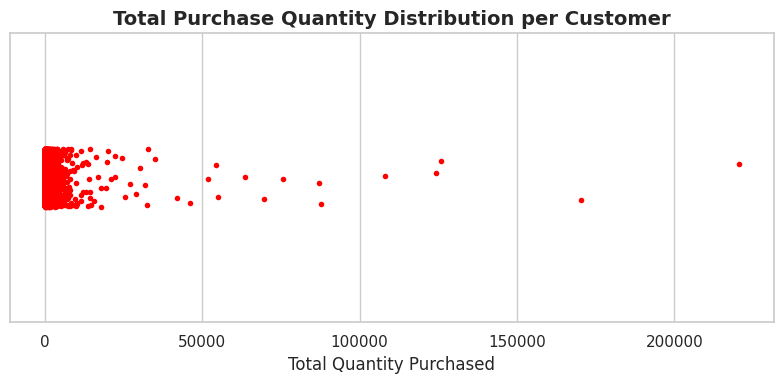

In [ ]:
# - What is the distribution of purchases per customer?
purchase_dist = df.groupby('Customer ID')['Quantity'].sum()
print(purchase_dist)

plt.figure(figsize=(8, 4))
sns.stripplot(x=purchase_dist.values, color='red', jitter=True, size=4)
plt.title("Total Purchase Quantity Distribution per Customer", fontsize=14, weight='bold')
plt.xlabel("Total Quantity Purchased")
plt.tight_layout()
plt.show()

Customer ID
14911.0    205
17850.0    155
12748.0    144
15311.0    121
13089.0    109
14606.0    102
14156.0    102
13694.0     94
17841.0     91
18102.0     89
Name: Invoice, dtype: int64


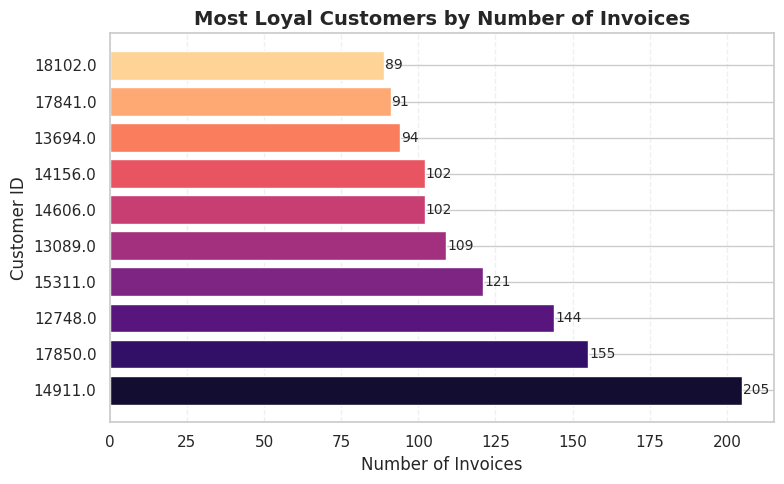

In [ ]:
# - Are there any loyal customers?
loyal_customers = df.groupby('Customer ID')['Invoice'].nunique().sort_values(ascending=False).head(10)
print(loyal_customers)

plt.figure(figsize=(8, 5))
colors = sns.color_palette("magma", len(loyal_customers))
bars = plt.barh(loyal_customers.index.astype(str), loyal_customers.values, color=colors)
plt.title("Most Loyal Customers by Number of Invoices", fontsize=14, weight='bold')
plt.xlabel("Number of Invoices")
plt.ylabel("Customer ID")
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Add value labels
for bar in bars:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
             round(bar.get_width()), va='center', fontsize=10)

plt.tight_layout()
plt.show()

### **4) Time Series & Seasonal Trends**

Month
2009-12     683504.010
2010-01     555802.672
2010-02     504558.956
2010-03     696978.471
2010-04     591982.002
2010-05     597833.380
2010-06     636371.130
2010-07     589736.170
2010-08     602224.600
2010-09     829013.951
2010-10    1033112.010
2010-11    1166460.022
2010-12     310656.370
Freq: M, Name: Sales, dtype: float64


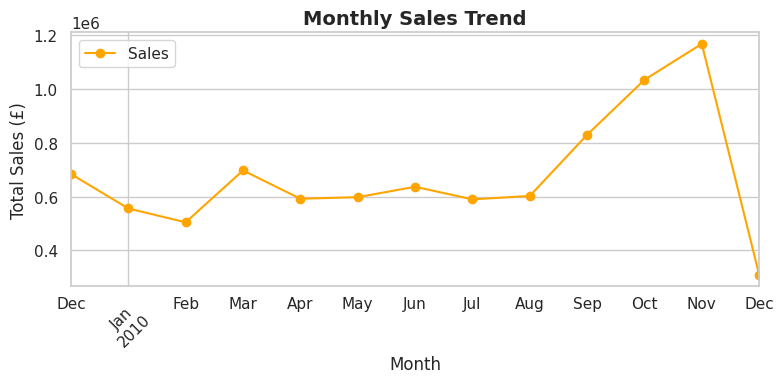

In [ ]:
# - What are the monthly sales trends?
df['Sales'] = df['Quantity'] * df['Price']
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
print(monthly_sales)

plt.figure(figsize=(8, 4))
monthly_sales.plot(kind='line', marker='o', color='orange',legend=True)
plt.title("Monthly Sales Trend", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Total Sales (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Weekly Patterns of Transaction
 DayOfWeek
Monday       1445606.495
Tuesday      1678827.301
Wednesday    1522046.713
Thursday     1858159.182
Friday       1269250.992
Saturday        9803.050
Sunday       1014540.011
Name: Sales, dtype: float64 



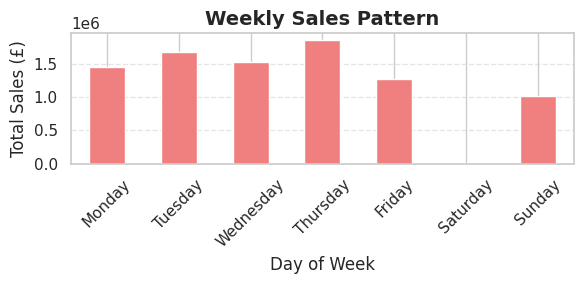


Daily Patterns of Transaction
 Date
2009-12-01    43894.87
2009-12-02    52762.06
2009-12-03    67413.62
2009-12-04    33913.81
2009-12-05     9803.05
                ...   
2010-12-05    31361.28
2010-12-06    31009.33
2010-12-07    53730.96
2010-12-08    39094.20
2010-12-09    38193.91
Name: Sales, Length: 307, dtype: float64 



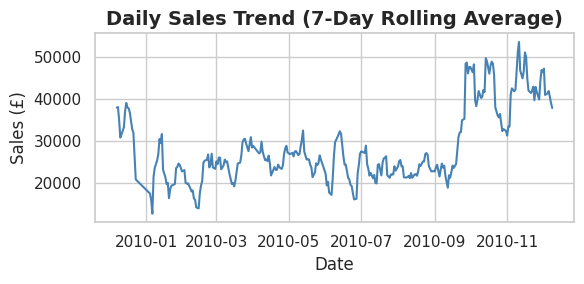

In [ ]:
# - What are the daily or weekly patterns of transactions?
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Sales'] = df['Quantity'] * df['Price']
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Date'] = df['InvoiceDate'].dt.date

# Weekly Sales Pattern
weekly_sales = df.groupby('DayOfWeek')['Sales'].sum()
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(week_order)
print('Weekly Patterns of Transaction\n',weekly_sales,'\n')

# Plot Weekly Pattern
plt.figure(figsize=(6, 3))
weekly_sales.plot(kind='bar', color='lightcoral')
plt.title("Weekly Sales Pattern", fontsize=14, weight='bold')
plt.xlabel("Day of Week")
plt.ylabel("Total Sales (£)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot Daily Sales (7-day rolling avg)
daily_sales = df.groupby('Date')['Sales'].sum()
print('\nDaily Patterns of Transaction\n',daily_sales,'\n')

plt.figure(figsize=(6, 3))
daily_sales.rolling(7).mean().plot(color='steelblue')
plt.title("Daily Sales Trend (7-Day Rolling Average)", fontsize=14, weight='bold')
plt.xlabel("Date")
plt.ylabel("Sales (£)")
plt.grid(True)
plt.tight_layout()
plt.show()


Peak Sales Month: 2010-11
Slowest Sales Month: 2010-12 



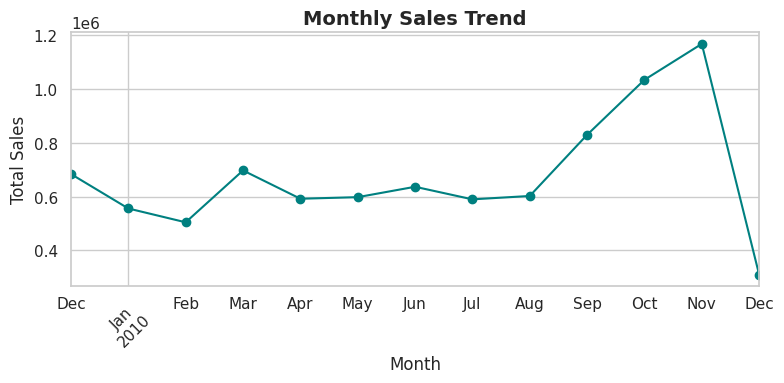

In [ ]:
# - Identify peak sales months and slow seasons.
monthly_sales = df.groupby('Month')['Sales'].sum()
print("Peak Sales Month:", monthly_sales.idxmax())
print("Slowest Sales Month:", monthly_sales.idxmin(),'\n')

# Plot
plt.figure(figsize=(8, 4))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Sales Trend", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### **5) Country Analysis**

Country
United Kingdom          17612
Germany                   347
EIRE                      316
France                    236
Netherlands               135
Sweden                     68
Spain                      66
Belgium                    52
Australia                  40
Switzerland                40
Portugal                   40
Channel Islands            30
Austria                    28
Italy                      28
Denmark                    26
Cyprus                     21
Finland                    16
Japan                      16
USA                        15
Greece                     13
Norway                     11
Poland                     10
Unspecified                 8
United Arab Emirates        8
Lithuania                   6
Malta                       4
Singapore                   4
Korea                       2
Bahrain                     2
Thailand                    2
Israel                      2
Iceland                     2
Canada                      2
Ni

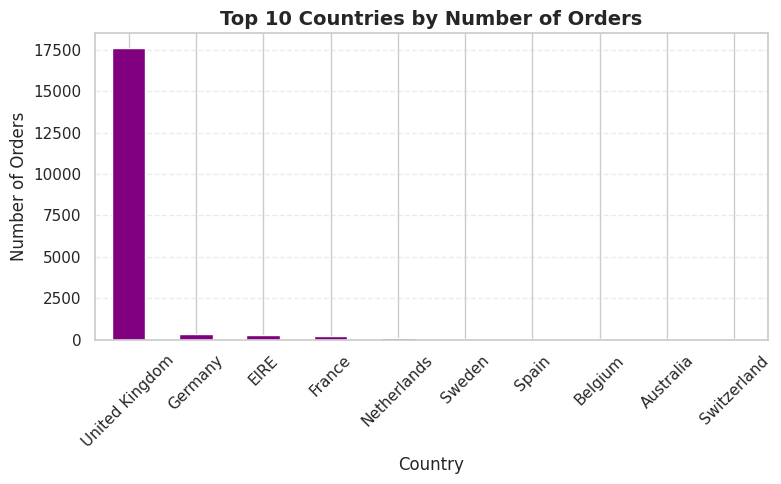

In [ ]:
# - Which countries have the highest number of orders?

# Count unique invoices per country
country_orders = df.groupby('Country')['Invoice'].nunique().sort_values(ascending=False)
print(country_orders)

# Plot top 10 countries by number of orders
plt.figure(figsize=(8, 5))
country_orders.head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Countries by Number of Orders", fontsize=14, weight='bold')
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Country
United Kingdom          7381644.433
EIRE                     356041.860
Netherlands              268784.350
Germany                  202025.391
France                   146107.070
Sweden                    53147.990
Denmark                   50906.850
Spain                     47568.650
Switzerland               43921.390
Australia                 31446.800
Channel Islands           24546.320
Belgium                   24537.580
Norway                    23944.180
Portugal                  23843.460
Italy                     15052.730
Greece                    14335.670
Austria                   13414.330
Cyprus                    11347.100
Japan                      9722.020
Finland                    7379.460
United Arab Emirates       7300.410
Unspecified                5946.580
Malta                      5373.500
Lithuania                  4892.680
USA                        4786.470
Singapore                  4037.770
Poland                     3567.800
Israel              

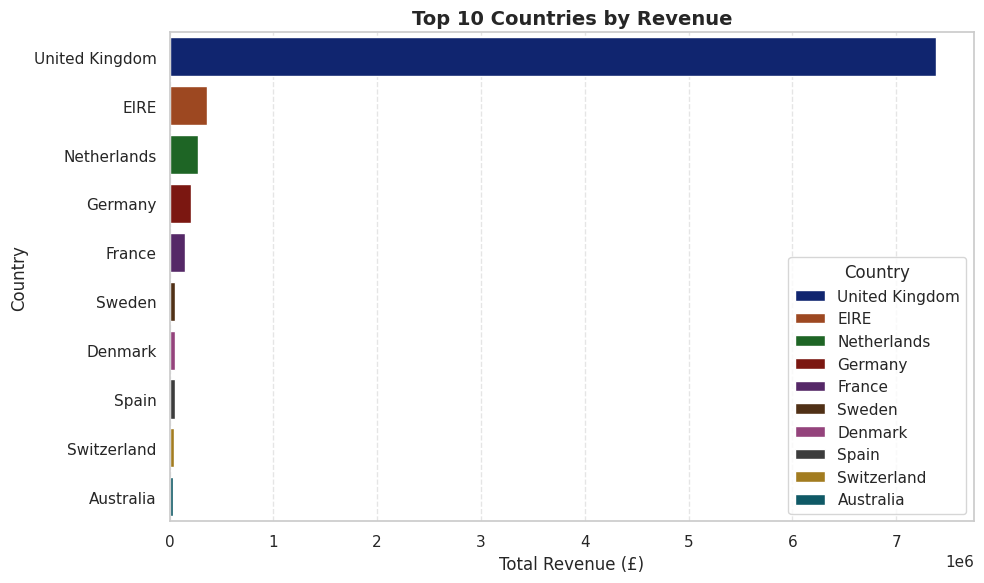

In [ ]:
# - Revenue comparison across countries
country_revenue = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)
print(country_revenue)

# Plot top 10 countries by revenue
plt.figure(figsize=(10, 6))
sns.barplot(
    x=country_revenue.head(10).values,
    y=country_revenue.head(10).index,
    hue=country_revenue.head(10).index,
    legend=True,
    palette="dark"
)
plt.title("Top 10 Countries by Revenue", fontsize=14, weight='bold')
plt.xlabel("Total Revenue (£)")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## **RFM Segmentation**

In [21]:
# Remove cancelled orders (Invoice starting with 'C') and missing customers
df = df[~df['Invoice'].astype(str).str.startswith('C')]
df = df[df['Customer ID'].notnull()]

# Convert date and calculate total sales
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Sales'] = df['Quantity'] * df['Price']

# Set reference date (1 day after the last purchase)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics for each customer
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency (in days)
    'Invoice': 'nunique',                                     # Frequency (unique invoices)
    'Sales': 'sum'                                             # Monetary (total spending)
})

# Rename columns for clarity
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# View the RFM table
print(rfm.head(10))



/tmp/ipython-input-21-997571514.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
/tmp/ipython-input-21-997571514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity'] * df['Price']


             Recency  Frequency  Monetary
Customer ID                              
12346.0          165         11    372.86
12347.0            3          2   1323.32
12348.0           74          1    222.16
12349.0           43          3   2671.14
12351.0           11          1    300.93
12352.0           11          2    343.80
12353.0           44          1    317.76
12355.0          203          1    488.21
12356.0           16          3   3562.25
12357.0           24          2  12079.99


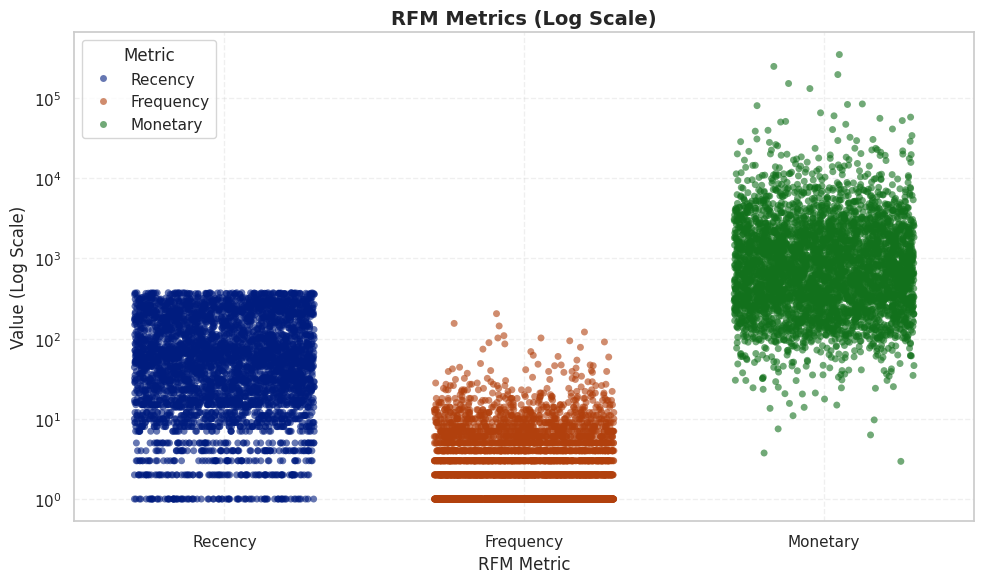

In [ ]:
# Melt the RFM dataframe to long format
rfm_melted = rfm[['Recency', 'Frequency', 'Monetary']].reset_index().melt(id_vars='Customer ID',var_name='Metric',value_name='Value')

plt.figure(figsize=(10, 6))
sns.stripplot(data=rfm_melted, x='Metric', y='Value',hue='Metric', palette='dark', jitter=0.3, alpha=0.6, legend=True)
plt.yscale('log')  # Apply log scale
plt.title("RFM Metrics (Log Scale)", fontsize=14, weight='bold')
plt.xlabel("RFM Metric")
plt.ylabel("Value (Log Scale)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()